# Summarizing used Python libraries
This notebook demonstrates how one can dive into summarizing generated code, in this case which Python libraries were used. The `_result.jsonl` files contain a column `completion`, which contains Python code as string. These code snipptes can be summarized for each model as shown here, e.g. by searching for common Python libraries.

In [1]:
import pandas as pd
import os

In [2]:
directory = "../data/"
# if you want to investigate a single model only, add its name here:
search_term = ""

# Enter the terms to search for here
common_libraries = [
'numpy',
'scipy',
'skimage',
'cv2',
'pandas',
'pyclesperanto_prototype',
'vedo',
'umap',
'dask',
'zarr',
'circle_fit',
'statsmodels',
'xarray',
'pillow',
'nibabel',
'SimpleITK',
'trimesh',
'itk']




First we collect all results and the corresponding models from the jsonl files.

In [3]:
collection = []
for filename in os.listdir(directory):
    if search_term in filename and filename.endswith("_results.jsonl"):
        df = pd.read_json(directory + filename, lines=True)
        df['model'] = filename.replace("samples_","").replace("_results","").replace(".jsonl","")
        collection.append(df)

if len(collection) == 1:
    df = collection[0]
else:
    df = pd.concat(collection)

In [4]:
df

,task_id,completion,full_response,result,passed,model
0,../test_cases/apply_otsu_threshold_and_count_p...,\nimport numpy as np\nfrom skimage import filt...,"Sure, here is the complete code with the funct...",failed:,False,deepseek-coder-v2
1,../test_cases/binary_closing.ipynb,\nimport numpy as np\n\ndef binary_closing(bin...,Here's the complete code for the function `bin...,passed,True,deepseek-coder-v2
2,../test_cases/binary_skeleton.ipynb,\nimport numpy as np\nfrom skimage import morp...,"Sure, here's the complete code with comments o...",passed,True,deepseek-coder-v2
3,../test_cases/bland_altman.ipynb,\nimport pandas as pd\nimport numpy as np\nimp...,```python\nimport pandas as pd\nimport numpy a...,passed,True,deepseek-coder-v2
4,../test_cases/combine_columns_of_tables.ipynb,\nimport pandas as pd\n\ndef combine_columns_o...,```python\nimport pandas as pd\n\ndef combine_...,passed,True,deepseek-coder-v2
...,...,...,...,...,...,...
565,../test_cases/workflow_batch_process_folder_me...,\n import os\n import pandas as pd\n ...,\n import os\n import pandas as pd\n ...,passed,True,reference_old_prompt
566,../test_cases/workflow_segmentation_counting.i...,\n import skimage\n import numpy as np\n...,\n import skimage\n import numpy as np\n...,passed,True,reference_old_prompt
567,../test_cases/workflow_segmentation_measuremen...,\n import skimage\n import numpy as np\n...,\n import skimage\n import numpy as np\n...,passed,True,reference_old_prompt
568,../test_cases/workflow_segment_measure_umap.ipynb,\n import numpy as np\n import pandas as...,\n import numpy as np\n import pandas as...,passed,True,reference_old_prompt


In [5]:
# Just some examples to get an idea
df.head(3)['completion'].tolist()

['\nimport numpy as np\nfrom skimage import filters\n\ndef apply_otsu_threshold_and_count_positive_pixels(image):\n    """\n    Takes an image as numpy array, applies Otsu\'s threshold method to it to create a binary image and \n    counts the positive pixels and returns this number.\n    """\n    \n    # Step 1: Apply Otsu\'s thresholding to convert the image to a binary image\n    thresh = filters.threshold_otsu(image)\n    binary_image = (image > thresh).astype(np.uint8)\n    \n    # Step 2: Count the positive pixels in the binary image\n    positive_pixels_count = np.sum(binary_image)\n    \n    return positive_pixels_count\n',
 '\nimport numpy as np\n\ndef binary_closing(binary_image, radius:int=1):\n    """\n    Applies binary closing with a square footprint with a given radius to a binary_image provided as numpy array and returns the result as numpy array.\n    \n    Binary Closing is an operation that combines two morphological operations: dilation followed by erosion. This seq

## Searching for common terms
First, we search the generated code for the common libraries as specified above.

In [6]:
# Define the function to count errors
def count_libs(group, lib_list):
    counts = {lib: group['completion'].str.contains(lib, regex=False).sum() for lib in lib_list}
    return pd.Series(counts)

# Apply the function to each model group
lib_counts = df.groupby('model').apply(count_libs, lib_list=common_libraries)

# Transpose the result for the desired format: models as columns, libs as rows
lib_counts = lib_counts.T

C:\Users\rober\AppData\Local\Temp\ipykernel_31296\760873324.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lib_counts = df.groupby('model').apply(count_libs, lib_list=common_libraries)


In [7]:
# reorder columns to be similar to evaluation result plots
with open("model_order.txt", 'r') as f:
    columns_in_order = f.readlines()
    columns_in_order = [c.strip() for c in columns_in_order]
columns_in_order

['reference',
 'reference_old_prompt',
 'gpt-4o-2024-05-13',
 'gpt-4o-2024-05-13_old_prompt',
 'deepseek-coder-v2',
 'deepseek-coder-v2_old_prompt']

In [8]:
lib_counts = lib_counts[columns_in_order]
lib_counts

model,reference,reference_old_prompt,gpt-4o-2024-05-13,gpt-4o-2024-05-13_old_prompt,deepseek-coder-v2,deepseek-coder-v2_old_prompt
numpy,240,220,479,442,493,480
scipy,70,70,127,118,118,89
skimage,220,220,93,102,150,149
cv2,0,0,33,66,59,112
pandas,60,60,93,99,101,101
pyclesperanto_prototype,40,40,0,0,0,0
vedo,20,20,0,0,0,0
umap,20,20,20,20,20,20
dask,10,10,0,0,0,0
zarr,10,10,10,10,10,10


0.13.2


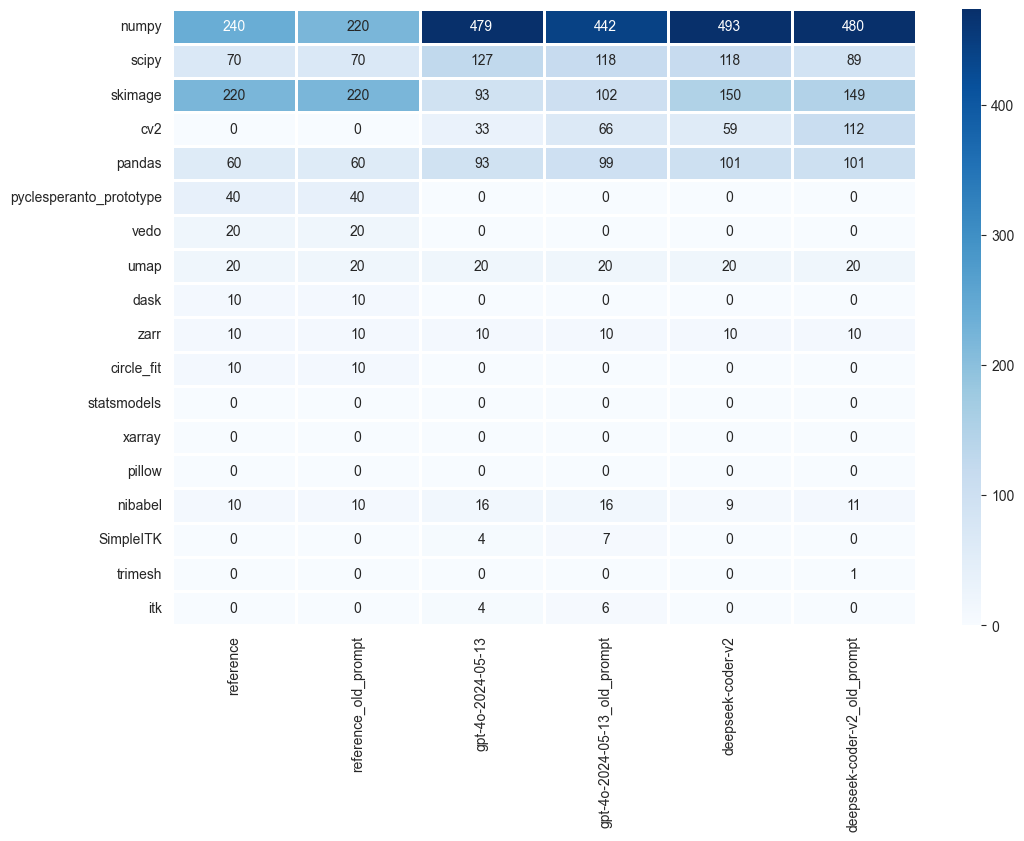

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print(sns.__version__)
sns.set_style("white")

df = lib_counts

# Separate the numerical data for plotting and the string column for y-axis labels
numerical_data = df.select_dtypes(include=[np.number])
mean_values = numerical_data.mean().sort_values(ascending=False)

# Plotting
fig = plt.figure(figsize=(12,8))
#plot square heatmap entries
sns.heatmap(numerical_data, annot=True, linewidths=1, fmt=".0f", cbar_kws={'shrink': 1, 'aspect': 2*16}, cmap="Blues", robust=True)
plt.gca().set_xlabel('')

plt.savefig("../docs/paper/used_libraries_heatmap.png", dpi=300,bbox_inches="tight")
plt.show()

In [10]:
# Iterate over the columns and format new names
new_column_names = [f"\\rot{{{col}}}" for col in lib_counts.columns]

# Update the DataFrame columns
lib_counts.columns = new_column_names
lib_counts

,\rot{reference},\rot{reference_old_prompt},\rot{gpt-4o-2024-05-13},\rot{gpt-4o-2024-05-13_old_prompt},\rot{deepseek-coder-v2},\rot{deepseek-coder-v2_old_prompt}
numpy,240,220,479,442,493,480
scipy,70,70,127,118,118,89
skimage,220,220,93,102,150,149
cv2,0,0,33,66,59,112
pandas,60,60,93,99,101,101
pyclesperanto_prototype,40,40,0,0,0,0
vedo,20,20,0,0,0,0
umap,20,20,20,20,20,20
dask,10,10,0,0,0,0
zarr,10,10,10,10,10,10


Next we save the dataframe as tex to disk, so that we can include it in the manuscript.

In [11]:
# Convert DataFrame to TeX format string
tex_str = lib_counts.to_latex()
tex_str = tex_str.replace("_", "\\_")
tex_str = tex_str.replace("prototype", "\\\\ prototype")

# Define filename for the TeX file
tex_filename = '../docs/paper/library_counts_table.tex'

# Write the TeX format string to a file
with open(tex_filename, 'w') as tex_file:
    tex_file.write(tex_str)